<a href="https://colab.research.google.com/github/narasimhanavpl/fruit-detector/blob/main/classifier-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
!pip install jmd_imagescraper

In [3]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from pathlib import PureWindowsPath
from jmd_imagescraper.core import *
from pathlib import Path

In [4]:
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
root = Path().cwd()/"Fruits"

duckduckgo_search(root, "Apple", "Apple fruit", max_results=150)
duckduckgo_search(root, "Orange", "Orange Fruit", max_results=150)
duckduckgo_search(root, "Kiwi", "Kiwi fruit", max_results=150)
duckduckgo_search(root, "Mango", "Mango Fruit", max_results=150)
duckduckgo_search(root, "Pineapple", "Pineapple Fruit", max_results=150)
duckduckgo_search(root, "Watermelon", "watermolon Fruit", max_results=150)
duckduckgo_search(root, "Banana", "Banana Fruit", max_results=150)
duckduckgo_search(root, "Pomegranate", "Pomegranate  Fruit", max_results=150)
duckduckgo_search(root, "Passionfruit", "Passion fruit", max_results=150)
duckduckgo_search(root, "Guava", "Guava Fruit", max_results=150)
duckduckgo_search(root, "Jackfruit", "Jackfruit Fruit", max_results=150)
duckduckgo_search(root, "Grape", "Grapes", max_results=150)

In [26]:
path = Path('Fruits')
fns = get_image_files(path)
fns

(#2010) [Path('Fruits/Watermelon/053_c1b77676.jpg'),Path('Fruits/Watermelon/133_c418b452.jpg'),Path('Fruits/Watermelon/067_193efc27.jpg'),Path('Fruits/Watermelon/102_60fe9046.jpg'),Path('Fruits/Watermelon/085_849ec2c7.jpg'),Path('Fruits/Watermelon/106_020f5395.jpg'),Path('Fruits/Watermelon/095_b9944389.jpg'),Path('Fruits/Watermelon/036_b7758b8a.jpg'),Path('Fruits/Watermelon/009_a20ffbbf.jpg'),Path('Fruits/Watermelon/129_8033caae.jpg')...]

In [27]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
failed.map(Path.unlink);

In [28]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [29]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [30]:
dls = fruits.dataloaders(path)

In [12]:
dls.vocab

['Apple', 'Banana', 'Grape', 'Guava', 'Jackfruit', 'Kiwi', 'Mango', 'Orange', 'Passionfruit', 'Pineapple', 'Pomegranate', 'Watermelon']

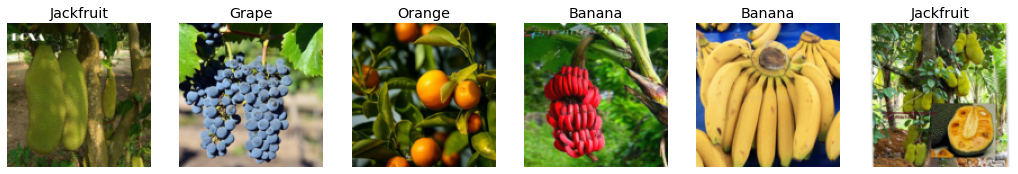

In [31]:
dls.valid.show_batch(max_n=6, nrows=1)

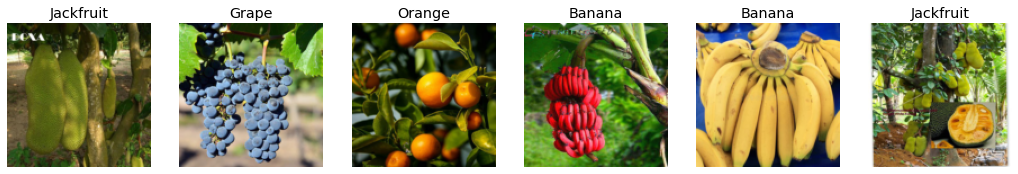

In [32]:
fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

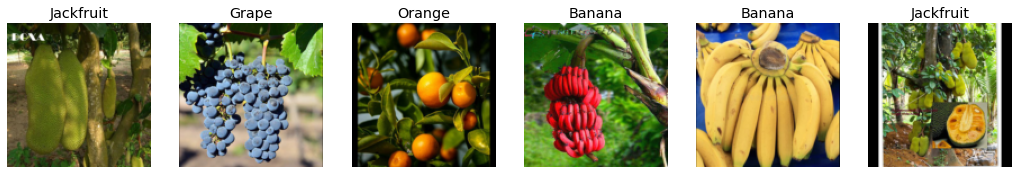

In [33]:
fruits = fruits.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = fruits.dataloaders(path)
dls.valid.show_batch(max_n=6, nrows=1)

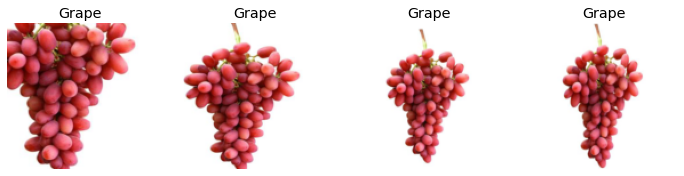

In [34]:
fruits = fruits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

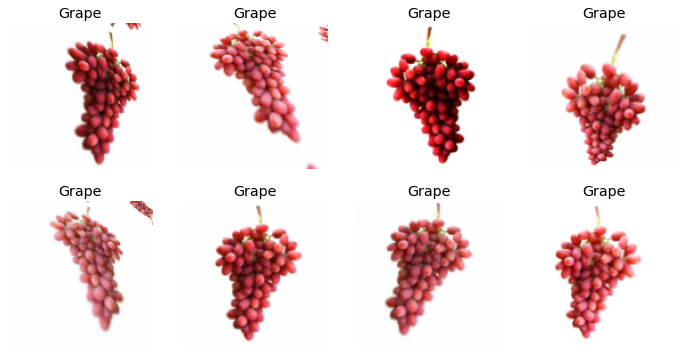

In [35]:
fruits = fruits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fruits.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [36]:
fruits = fruits.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fruits.dataloaders(path)

In [37]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.602024,0.759904,0.225539,00:14


epoch,train_loss,valid_loss,error_rate,time
0,1.089925,0.541622,0.159204,00:14
1,0.846346,0.456815,0.147595,00:14
2,0.661960,0.413240,0.116086,00:14
3,0.525747,0.371949,0.109453,00:14
4,0.427594,0.362413,0.106136,00:14


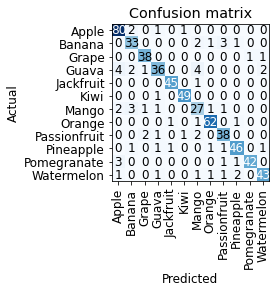

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(10, nrows=2)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [25]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [40]:
learn.export()

In [43]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [44]:
learn_inf = load_learner(path/'export.pkl')

In [45]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [46]:
img = PILImage.create(btn_upload.data[-1])

In [47]:
pred,pred_idx,probs = learn_inf.predict(img)

In [48]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Passionfruit; Probability: 0.8923')